# Classification

In [1]:
import torch.nn as nn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import torch 

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
data=load_breast_cancer()

In [4]:
X,Y=data['data'],data['target']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=101)

In [6]:
scaler=StandardScaler()

In [17]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
N,D=X_train.shape

In [8]:
model=nn.Sequential(
    nn.Linear(D,1),
    nn.Sigmoid()
)

In [9]:
Loss=nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [10]:
X_train=torch.from_numpy(X_train.astype(np.float32))
X_test=torch.from_numpy(X_test.astype(np.float32))
y_train=torch.from_numpy(y_train.astype(np.float32)).reshape(-1,1)
y_test=torch.from_numpy(y_test.astype(np.float32)).reshape(-1,1)

In [11]:
n_epochs=2000
train_losses=np.zeros(n_epochs)
test_losses=np.zeros(n_epochs)
acc=np.zeros(n_epochs)
for i in range(n_epochs):
  model.train()
  optimizer.zero_grad()
  outputs=model(X_train)
  error=Loss(outputs,y_train)
  train_losses[i]=error.item()
  predicted=np.round(outputs.detach().numpy())
  acc[i]=np.mean(predicted==y_train.detach().numpy())
  error.backward()
  optimizer.step()
  # test losses
  test_output=model(X_test)
  error_test=Loss(test_output,y_test)
  test_losses[i]=error_test.item()
  if (i + 1) % 50  == 0:
    print(f'Epochs: {i+1}/{n_epochs} , Train_Loss: {error.item()}, Test_Loss:{error_test.item()} ')

Epochs: 50/2000 , Train_Loss: 0.6229633688926697, Test_Loss:0.6533323526382446 
Epochs: 100/2000 , Train_Loss: 0.4339376389980316, Test_Loss:0.47296687960624695 
Epochs: 150/2000 , Train_Loss: 0.33810773491859436, Test_Loss:0.38108599185943604 
Epochs: 200/2000 , Train_Loss: 0.2807169556617737, Test_Loss:0.3265824317932129 
Epochs: 250/2000 , Train_Loss: 0.24210773408412933, Test_Loss:0.290049284696579 
Epochs: 300/2000 , Train_Loss: 0.21419739723205566, Test_Loss:0.2635114789009094 
Epochs: 350/2000 , Train_Loss: 0.19302771985530853, Test_Loss:0.24319308996200562 
Epochs: 400/2000 , Train_Loss: 0.1763981580734253, Test_Loss:0.22706259787082672 
Epochs: 450/2000 , Train_Loss: 0.16297666728496552, Test_Loss:0.2139139026403427 
Epochs: 500/2000 , Train_Loss: 0.15190759301185608, Test_Loss:0.20297642052173615 
Epochs: 550/2000 , Train_Loss: 0.14261560142040253, Test_Loss:0.19372984766960144 
Epochs: 600/2000 , Train_Loss: 0.1346994787454605, Test_Loss:0.18580740690231323 
Epochs: 650/2000

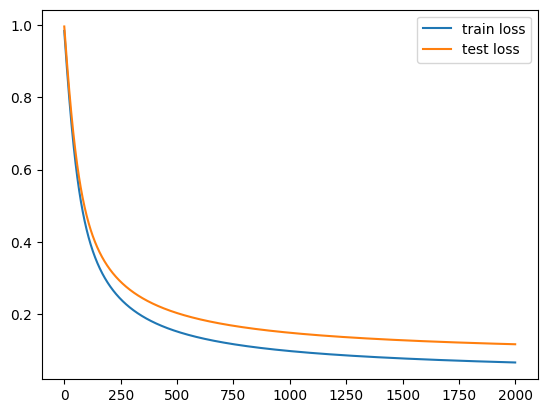

In [12]:
plt.plot(train_losses,label='train loss')
plt.plot(test_losses,label='test loss')
plt.legend()

In [13]:
predicted=model(X_train)
predicted=np.round(predicted.detach().numpy())
train_acc=np.mean(predicted==y_train.detach().numpy())
#-----
predicted_test=model(X_test)
predicted_test=np.round(predicted_test.detach().numpy())
test_acc=np.mean(predicted_test==y_test.detach().numpy())
 
print(train_acc , test_acc)

0.9798994974874372 0.9766081871345029


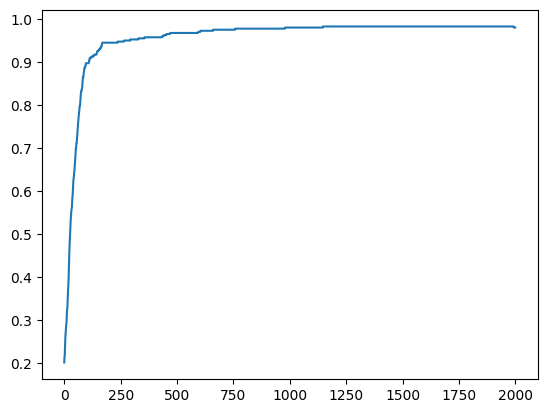

In [14]:
plt.plot(acc)

In [15]:
# saving our PyToruch model
from pathlib import Path

# 1.Create models dirctiory
MODEL_PATH=Path('models')
MODEL_PATH.mkdir(parents=True,exist_ok=True)
# 2.Create model save path
MODEL_NAME='first_pytorch.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME
# 3.Save model state_dict
torch.save(model.state_dict(),MODEL_SAVE_PATH)

In [18]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model = nn.Sequential(
    nn.Linear(30,1),
    nn.Sigmoid()
)
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [19]:
loaded_model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.4392, -0.4823, -0.3648, -0.5350, -0.2080, -0.0960, -0.3955, -0.3922,
                       -0.2666,  0.6877, -0.4451,  0.0551, -0.3100, -0.5553,  0.0116,  0.1650,
                        0.2165, -0.3272,  0.2159,  0.8653, -0.3902, -0.6500, -0.4079, -0.3543,
                       -0.5133, -0.3405, -0.5751, -0.5812, -0.6312, -0.3396]])),
             ('0.bias', tensor([0.7763]))])